In [ ]:
!pip install keras

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, InputLayer, Conv2D, MaxPool2D
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

In [3]:
train_path="rps-final-dataset/train"
test_path="rps-final-dataset/test"
val_path="rps-final-dataset/val"

In [4]:
import os
import cv2
x_train=[]
for folder in os.listdir(train_path):
    sub_path=train_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(64,64))
        x_train.append(img_arr)

In [5]:
image_path

'rps-final-dataset/train/scissors/ZzIlyDP6opy9ifkB.png'

In [6]:
x_test=[]
for folder in os.listdir(test_path):
    sub_path=test_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(64,64))
        x_test.append(img_arr)

In [7]:
x_val=[]
for folder in os.listdir(val_path):
    sub_path=val_path+"/"+folder
    for img in os.listdir(sub_path):
        image_path=sub_path+"/"+img
        img_arr=cv2.imread(image_path)
        img_arr=cv2.resize(img_arr,(64,64))
        x_val.append(img_arr)

In [8]:
# Import the NumPy module
import numpy as np

# Convert the lists into NumPy arrays
train_x=np.array(x_train)
test_x=np.array(x_test)
val_x=np.array(x_val)

x_test, must be divided by 255.0 for normalization

In [9]:
test_x=test_x/255.0

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255, zoom_range = 0.2,
horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,target_size
= (64, 64), batch_size = 32, class_mode = 'sparse')

Found 1401 images belonging to 3 classes.


In [11]:
test_set = test_datagen.flow_from_directory(test_path, target_size =
(64, 64), batch_size = 32, class_mode = 'sparse')

Found 437 images belonging to 3 classes.


In [12]:
val_set = val_datagen.flow_from_directory(val_path, target_size = (64,
64), batch_size = 32, class_mode = 'sparse')

Found 350 images belonging to 3 classes.


In [13]:
train_y=training_set.classes
test_y=test_set.classes
val_y=val_set.classes

In [14]:
training_set.class_indices
train_y.shape,test_y.shape,val_y.shape

((1401,), (437,), (350,))

In [15]:
labels = {value: key for key, value in
training_set.class_indices.items()}
print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
      print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : paper
1 : rock
2 : scissors


View some sample training images

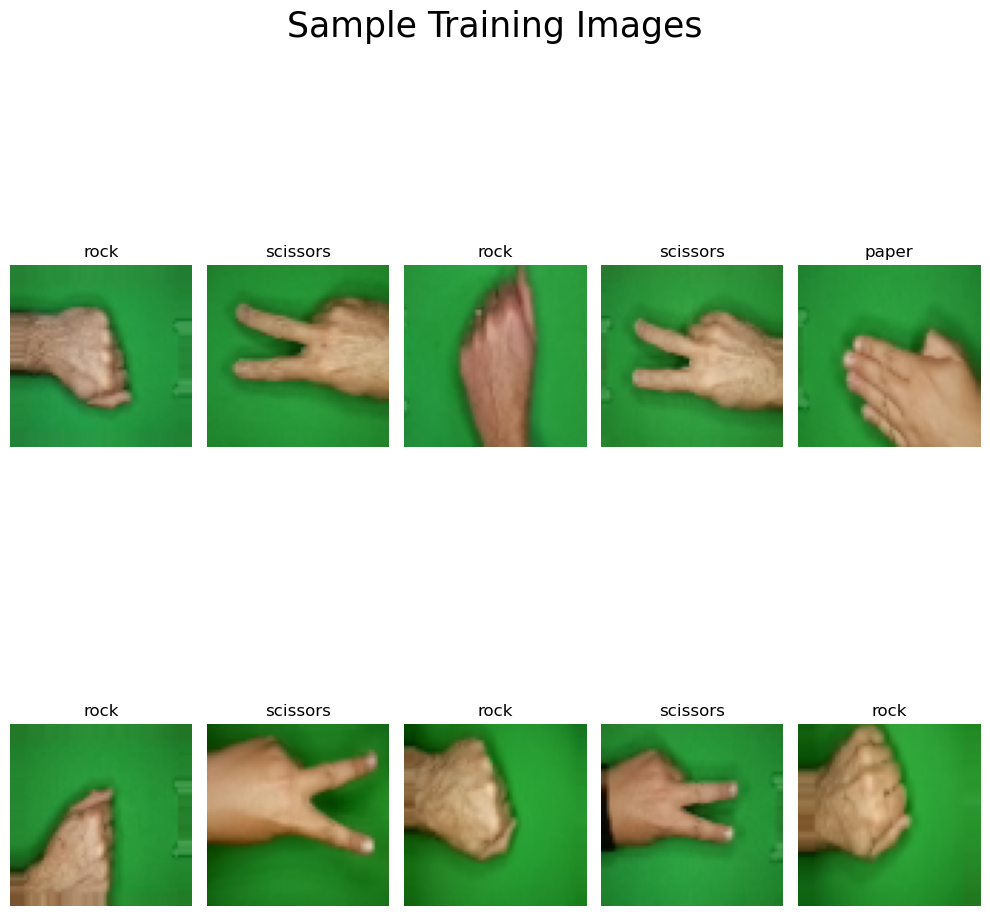

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(10, 12))
idx = 0
for i in range(2):
    for j in range(5):
        #label = labels[np.argmax(training_set[0][1][idx])]
        label = labels[training_set[0][1][idx]]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(training_set[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1
plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=25)
plt.show()

Build the model

In [17]:
import tensorflow as tf
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.InputLayer(shape=[64, 64, 3]))
cnn.add(tf.keras.layers.Conv2D(filters=5, kernel_size=3,
activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3,
activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=3, activation='softmax'))
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 5)      │           140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 5)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         1,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 804,943 (3.07 MB)

 Trainable params: 804,943 (3.07 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
cnn.compile(optimizer = 'adam', loss =
'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [19]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
early_stopping_monitor = EarlyStopping(monitor='val_loss', mode='min',
verbose=1, patience=5)
#Early stopping to avoid overfitting of model

In [20]:
import warnings
warnings.filterwarnings("ignore")

In [21]:
model_file = 'best_cnn_model.keras'
model_check_point = ModelCheckpoint(model_file, monitor='val_loss',
mode='min', verbose=1, save_best_only=True)
# fit the model
history = cnn.fit(
    training_set,
    validation_data=val_set ,
    epochs=10,
    callbacks=[early_stopping_monitor, model_check_point],
    batch_size=32,shuffle=True)

Epoch 1/10
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - accuracy: 0.3598 - loss: 1.2431
Epoch 1: val_loss improved from inf to 1.02464, saving model to best_cnn_model.keras
44/44 ━━━━━━━━━━━━━━━━━━━━ 22s 328ms/step - accuracy: 0.3613 - loss: 1.2404 - val_accuracy: 0.5514 - val_loss: 1.0246
Epoch 2/10
41/44 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step - accuracy: 0.5671 - loss: 0.9873
Epoch 2: val_loss improved from 1.02464 to 0.77422, saving model to best_cnn_model.keras
44/44 ━━━━━━━━━━━━━━━━━━━━ 16s 304ms/step - accuracy: 0.5726 - loss: 0.9813 - val_accuracy: 0.7200 - val_loss: 0.7742
Epoch 3/10
42/44 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step - accuracy: 0.7495 - loss: 0.6850
Epoch 3: val_loss improved from 0.77422 to 0.52602, saving model to best_cnn_model.keras
44/44 ━━━━━━━━━━━━━━━━━━━━ 15s 290ms/step - accuracy: 0.7500 - loss: 0.6826 - val_accuracy: 0.8286 - val_loss: 0.5260
Epoch 4/10
41/44 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step - accuracy: 0.8399 - loss: 0.4724
Epoch 4: val_loss improved from 0.52602

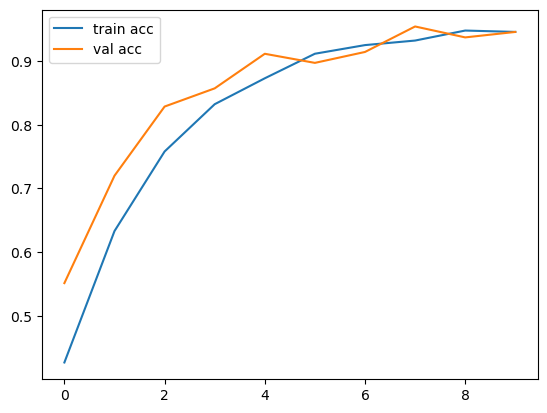

In [22]:
# Import the necessary modules
import matplotlib.pyplot as plt
# Plot the accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

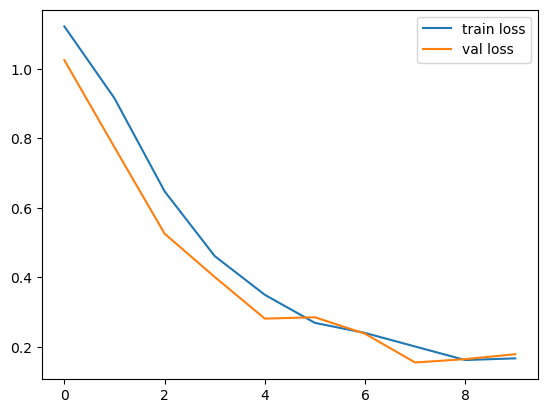

In [23]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
from keras.models import load_model
model = load_model('best_cnn_model.keras')

In [24]:
# Evaluate the model on the test data
model.evaluate(test_set, batch_size=32)

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

#predict
y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)
#get classification report
print(classification_report(y_pred, test_y))
#get confusion matrix
print(confusion_matrix(y_pred,test_y))

14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 206ms/step - accuracy: 0.9511 - loss: 0.1410
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step
              precision    recall  f1-score   support

           0       0.06      0.73      0.10        11
           1       1.00      0.55      0.71       262
           2       0.97      0.89      0.93       164

    accuracy                           0.68       437
   macro avg       0.68      0.72      0.58       437
weighted avg       0.97      0.68      0.78       437

[[  8   0   3]
 [116 145   1]
 [ 18   0 146]]


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


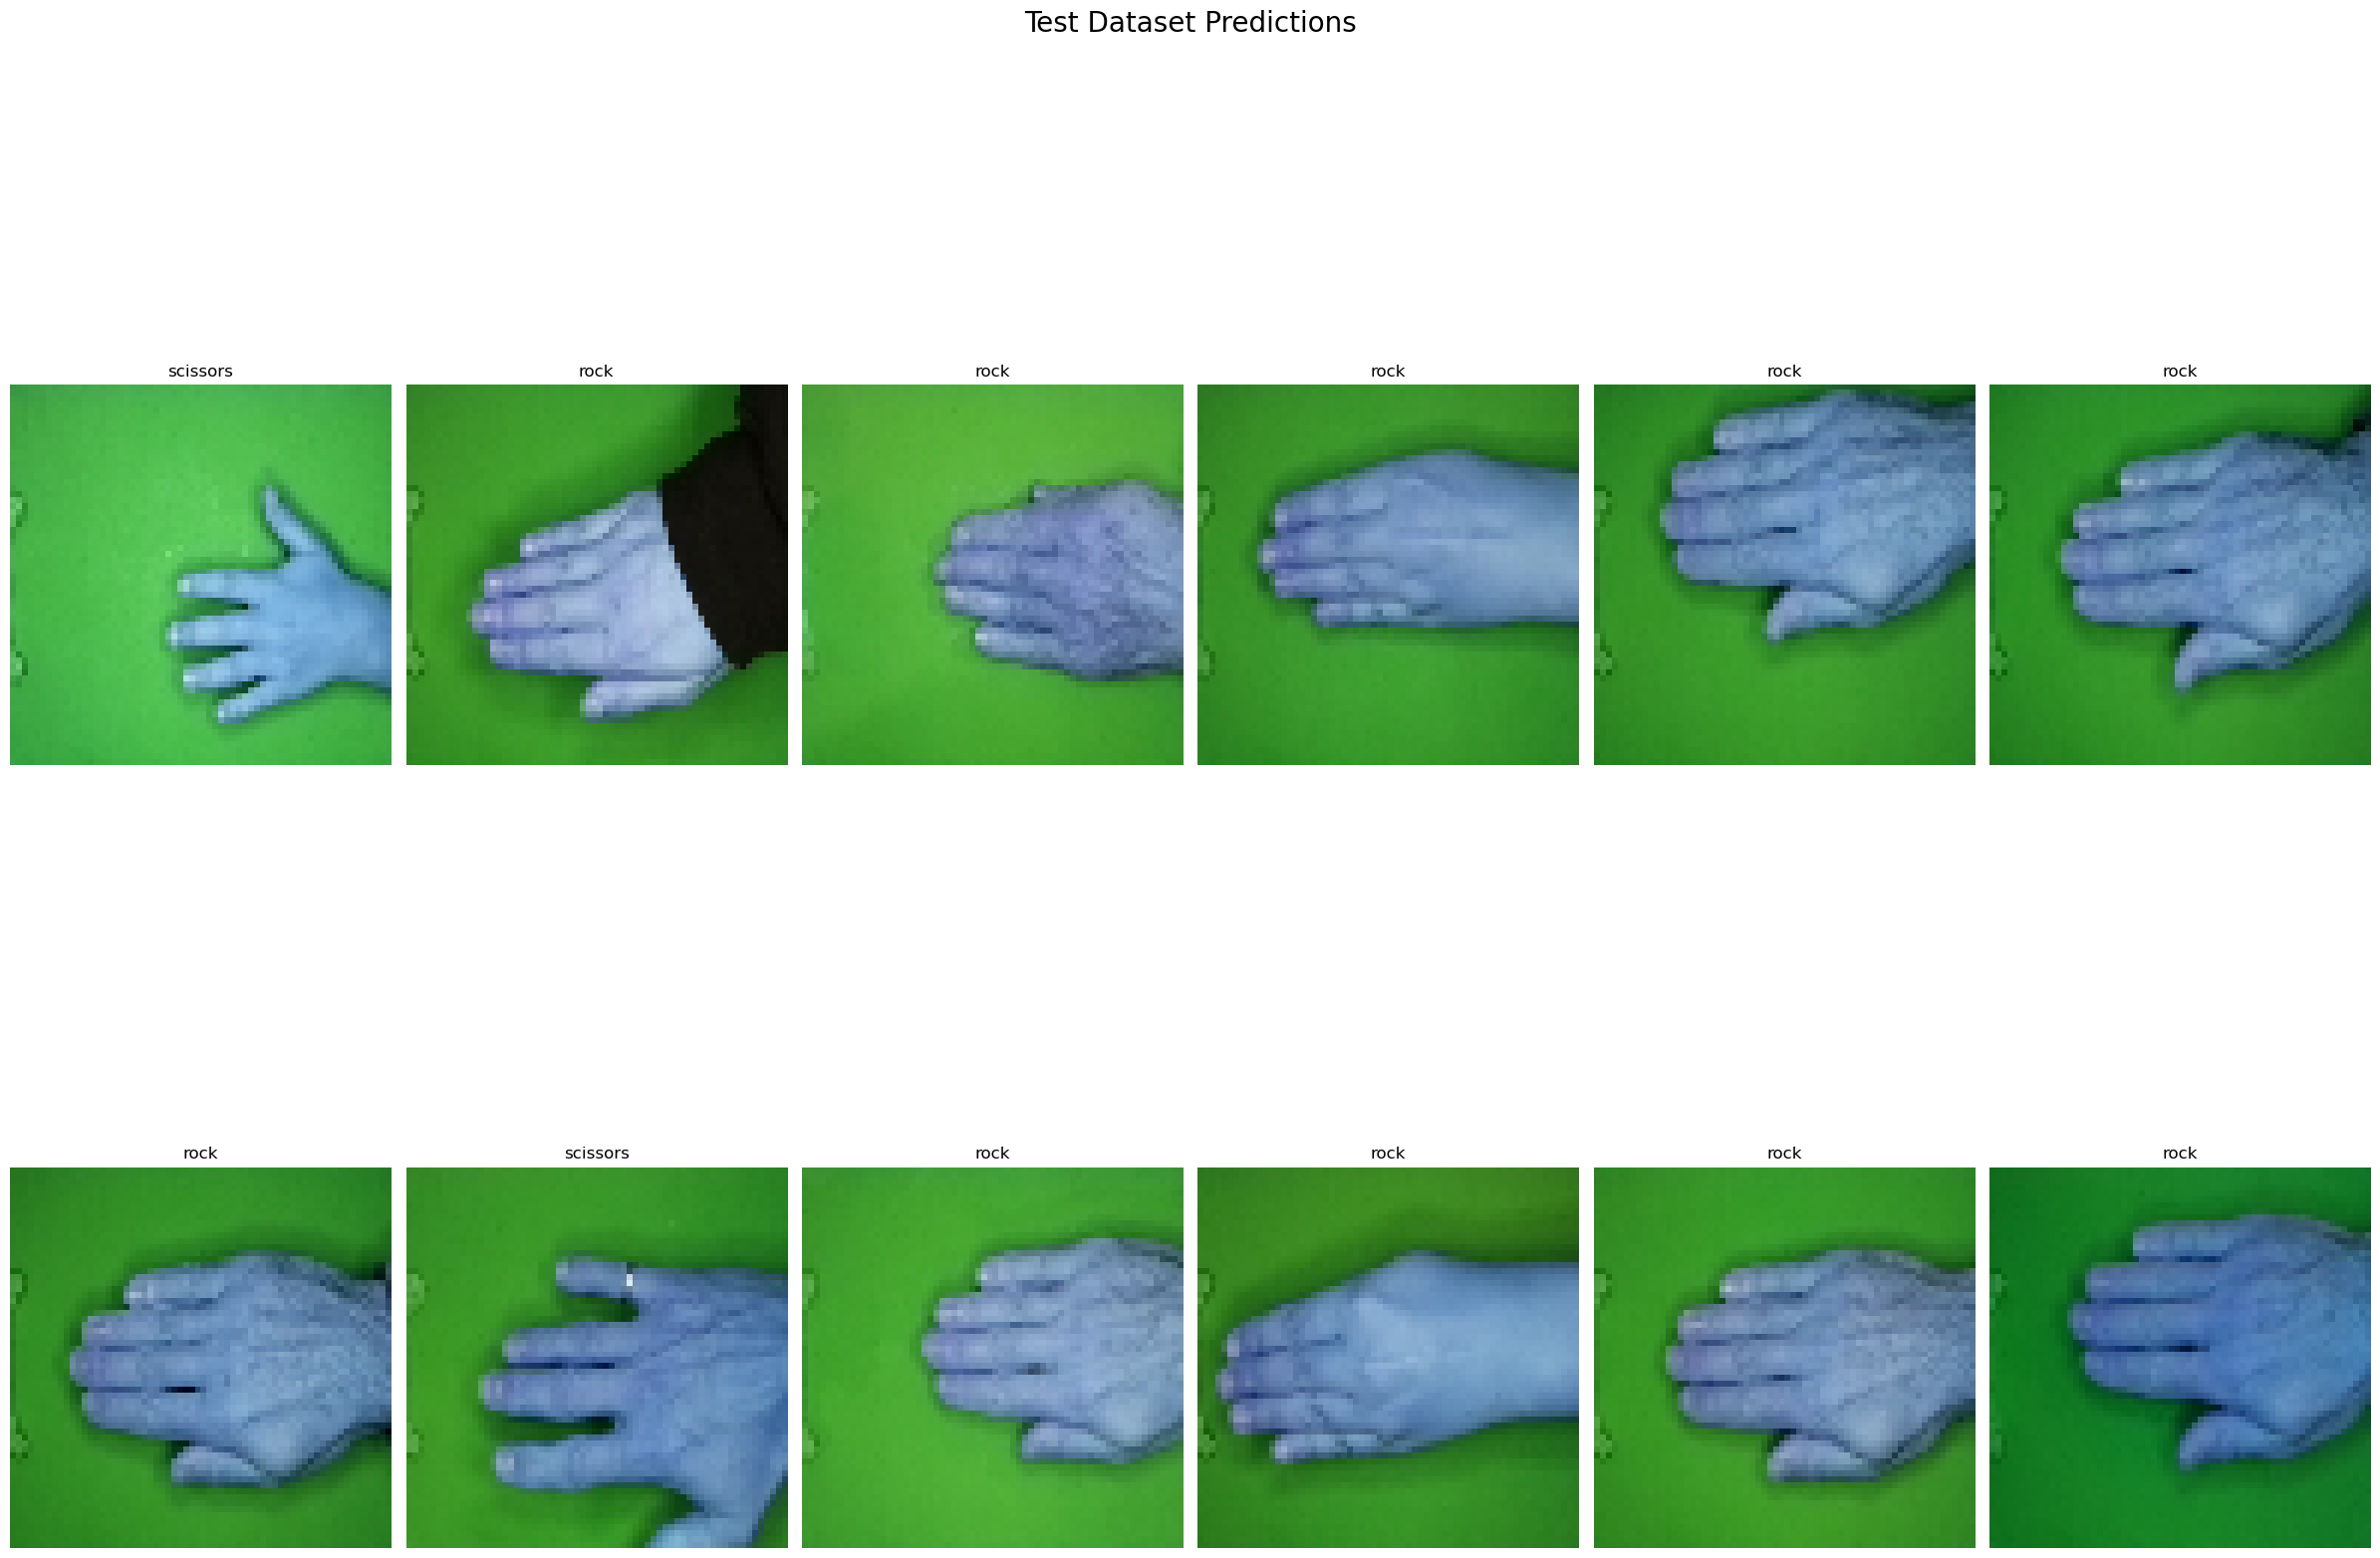

In [25]:
predictions = model.predict(test_x)
fig, ax = plt.subplots(nrows=2, ncols=6, figsize=(24, 20))
idx = 0
for i in range(2):
    for j in range(6):
        predicted_label = labels[np.argmax(predictions[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(test_x[idx])
        ax[i, j].axis("off")
        idx += 1
        
plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()